In [1]:
import pandas as pd
import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from baseline_package.base_predictor import BasePredictor

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
results = []

In [3]:
d_path = "dataset/preprocessed.csv"

In [4]:
rsf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=120,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=4,
    max_leaf_nodes=None,
    bootstrap=False,
    max_features='sqrt',
    min_weight_fraction_leaf=0.0,
    class_weight='balanced',
    warm_start=False,
    ccp_alpha=0.0
)

param_grid_rsf = {
    'criterion' : ['entropy','log_loss'],
    'n_estimators' : [50,100,120,150],
    'max_depth' : [None],
    'min_samples_split' : [4,5,6],
    'min_samples_leaf' : [2,3,4],
    'max_leaf_nodes' : [None],
    'bootstrap' : [False],
    'max_features' : ['sqrt','log2'],
    'min_weight_fraction_leaf' : [0.0],
    'class_weight' : [{0:1, 1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.005,0.01]
}

bp_rsf = BasePredictor(model = rsf, d_path = d_path, target = 'mortality_30_days', param_grid = None, n_splits = 5)
bp_rsf.run(features = None, select_path = None)

In [5]:
bp_rsf.best_params

In [6]:
bp_rsf.sens_re

[41.891891891891895]

In [7]:
bp_rsf.specs_re

[96.10091743119266]

In [8]:
bp_rsf.confs_re

[array([[419,  17],
        [ 43,  31]])]

In [9]:
bp_rsf.best_params

In [10]:
bp_rsf.f1s_re

[0.8715199103117824]

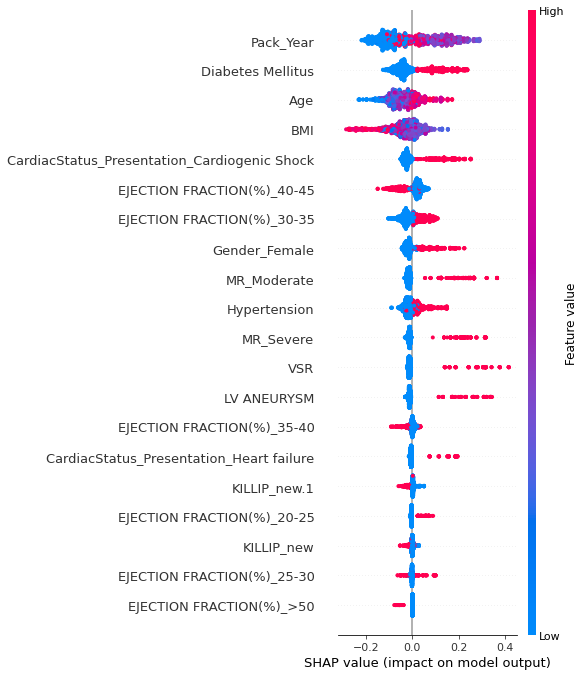

In [11]:
rsf_shap_re = shap.TreeExplainer(bp_rsf.model)
shap_vals = rsf_shap_re.shap_values(bp_rsf.data_re['X'])

shap.summary_plot(shap_vals[1],bp_rsf.data_re['X'].astype('float64'))

In [12]:
bp_rsf.sens_un

[86.48648648648648]

In [13]:
bp_rsf.specs_un

[98.01980198019803]

In [14]:
bp_rsf.f1s_un

[0.9678360071301247]

In [15]:
bp_rsf.confs_un

[array([[297,   6],
        [  5,  32]])]

In [16]:
log_r = LogisticRegression()

param_grid_logr = {
    'penalty' : ['l2'],
    'dual' : [False],
    'tol' : [1e-3,1e-4],
    'C' : [0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2],
    'fit_intercept' : [True],
    'class_weight' : [{0:1, 1:5},{0:1,1:2},{0:1, 1:42},'balanced','balanced_subsample'],
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [5000,1000],
    'warm_start' : [False],
    'n_jobs' : [None],
    'multi_class' : ['auto'],
    'l1_ratio' : [None],
}

bp_logr = BasePredictor(model = log_r, d_path = d_path, target = 'mortality_30_days', param_grid = param_grid_logr, n_splits = 5)
bp_logr.run(features = None, select_path = None)


520 fits failed out of a total of 2600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
520 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/Library/Frameworks/Pyth

In [17]:
bp_logr.best_params

{'C': 0.6,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'solver': 'lbfgs',
 'tol': 0.001,
 'warm_start': False}

In [18]:
bp_logr.sens_re

[62.16216216216216]

In [19]:
bp_logr.specs_re

[77.98165137614679]

In [20]:
bp_logr.f1s_re

[0.7848524263215514]

In [21]:
bp_logr.confs_re

[array([[340,  96],
        [ 28,  46]])]

In [22]:
bp_logr.sens_un

[64.86486486486487]

In [23]:
bp_logr.specs_un

[80.19801980198021]

In [24]:
bp_logr.f1s_un

[0.8179670969498105]

In [25]:
bp_logr.confs_un

[array([[243,  60],
        [ 13,  24]])]

In [26]:
etc = ExtraTreesClassifier(
    criterion='entropy',
    bootstrap=False,
    class_weight='balanced',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=3,
    min_weight_fraction_leaf=0.0,
    random_state=0,
    warm_start=False
)

param_grid_etc = {
    'criterion' : ['entropy','log_loss'],
    'max_depth' : [None],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3],
    'min_weight_fraction_leaf' : [0.0],
    'max_features' : ['sqrt','log2'],
    'max_leaf_nodes' : [None],
    'min_impurity_decrease' : [0.0],
    'bootstrap' : [True, False],
    'class_weight' : [{0:1,1:1},{0:1,1:2},{0:1,1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.0,0.005],
    'random_state' : [0]
}

bp_etc = BasePredictor(model = etc, d_path = d_path, target =  'mortality_30_days', param_grid = None, n_splits = 5)
bp_etc.run(features = None, select_path = None)

In [27]:
bp_etc.best_params

In [28]:
bp_etc.sens_re

[31.08108108108108]

In [29]:
bp_etc.specs_re

[97.01834862385321]

In [30]:
bp_etc.f1s_re

[0.8554543495719966]

In [31]:
bp_etc.confs_re

[array([[423,  13],
        [ 51,  23]])]

In [32]:
bp_etc.sens_un

[89.1891891891892]

In [33]:
bp_etc.specs_un

[98.67986798679867]

In [34]:
bp_etc.f1s_un

[0.9764705882352941]

In [35]:
bp_etc.confs_un

[array([[299,   4],
        [  4,  33]])]

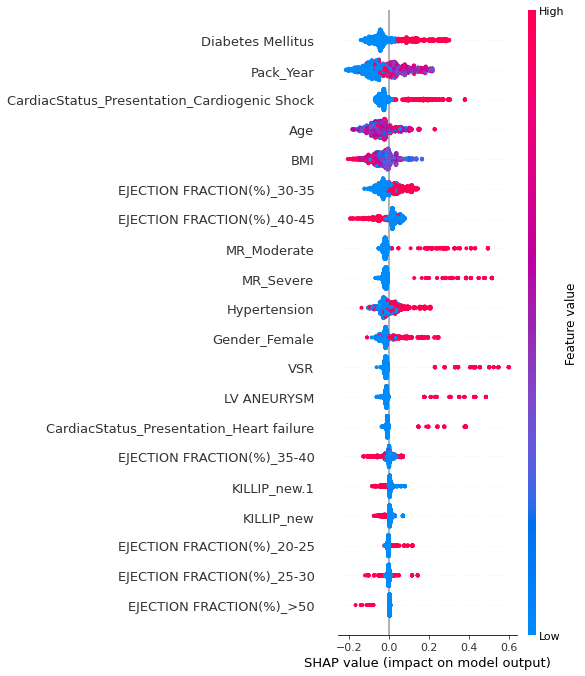

In [36]:
etc_shap_re = shap.TreeExplainer(bp_etc.model)
shap_vals = etc_shap_re.shap_values(bp_etc.data_re['X'])

shap.summary_plot(shap_vals[1],bp_etc.data_re['X'].astype('float64'))

In [37]:
print(bp_etc.data_re['Y'][bp_etc.data_re['Y']==0].shape)
print(bp_etc.data_re['Y'][bp_etc.data_re['Y']==1].shape)
print(bp_etc.data_re['Y'][bp_etc.data_re['Y']<=1].shape)

(1200,)
(1200,)
(2400,)


In [38]:
results = []

In [39]:
results.append(["RSF", sum(bp_rsf.sens)/5, sum(bp_rsf.specs)/5, sum(bp_rsf.f1s)/5, None,
                sum(bp_rsf_resampled.sens)/5, sum(bp_rsf_resampled.specs)/5, sum(bp_rsf_resampled.f1s)/5])

AttributeError: 'BasePredictor' object has no attribute 'sens'

In [ ]:
results.append(["ExtraTree", sum(bp_etc.sens)/5, sum(bp_etc.specs)/5, sum(bp_etc.f1s)/5, None,
                sum(bp_etc_resampled.sens)/5, sum(bp_etc_resampled.specs)/5, sum(bp_etc_resampled.f1s)/5])

In [ ]:
results.append(["LogitR", sum(bp_logr.sens)/5, sum(bp_logr.specs)/5, sum(bp_logr.f1s)/5, None,
                sum(bp_logr_resampled.sens)/5, sum(bp_logr_resampled.specs)/5, sum(bp_logr_resampled.f1s)/5])

In [ ]:
df_results = pd.DataFrame(data=results,
            columns=["Model", "Sensitivity","Specificity","F1-score", None, "Sensitivity (w/ resampling)","Specificity (w/ resampling)","F1-Score (w/ resampling)"])

In [ ]:
df_results.to_excel("results/traditional_model_results.xlsx")